# EMA



In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [44]:
df = pd.read_csv("AAPL.csv")
df2 = df.drop(["Open",'High', 'Low','Volume'], axis=1)
df2 = df2.rename(columns={'Close': 'Price'})
df = df2.set_index('Date')

In [45]:
data = df2.set_index('Date')

In [46]:
data

,Price
Date,
2019-01-02,39.48
2019-01-03,35.55
2019-01-04,37.07
2019-01-07,36.98
2019-01-08,37.69
...,...
2023-12-22,193.60
2023-12-26,193.05
2023-12-27,193.15


In [47]:
ema_s = 50
ema_l = 200

In [48]:
data["EMA_S"] = data.Price.ewm(span = ema_s, min_periods = ema_s).mean()
data["EMA_L"] = data.Price.ewm(span = ema_l, min_periods = ema_l).mean()

In [49]:
data

,Price,EMA_S,EMA_L
Date,,,
2019-01-02,39.48,NaN,NaN
2019-01-03,35.55,NaN,NaN
2019-01-04,37.07,NaN,NaN
2019-01-07,36.98,NaN,NaN
2019-01-08,37.69,NaN,NaN
...,...,...,...
2023-12-22,193.60,188.226228,177.501485
2023-12-26,193.05,188.415396,177.656197
2023-12-27,193.15,188.601066,177.810365


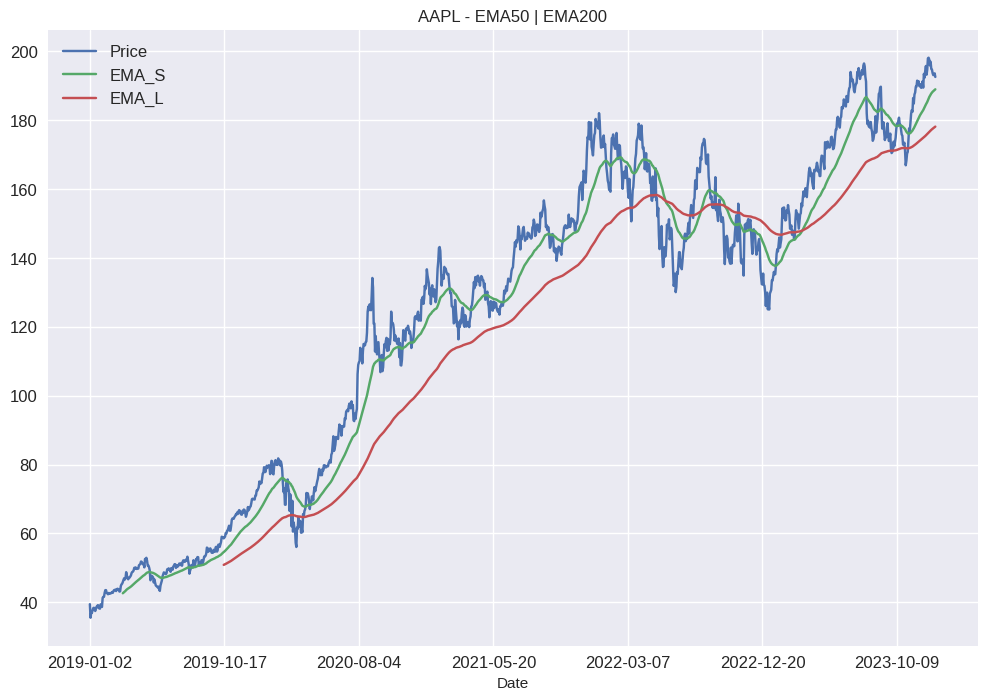

In [50]:
data.plot(figsize = (12, 8), title = "AAPL - EMA{} | EMA{}".format(ema_s, ema_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [51]:
data["position"] = np.where(data["EMA_S"] > data["EMA_L"], 1, -1 )

In [52]:
data

,Price,EMA_S,EMA_L,position
Date,,,,
2019-01-02,39.48,NaN,NaN,-1
2019-01-03,35.55,NaN,NaN,-1
2019-01-04,37.07,NaN,NaN,-1
2019-01-07,36.98,NaN,NaN,-1
2019-01-08,37.69,NaN,NaN,-1
...,...,...,...,...
2023-12-22,193.60,188.226228,177.501485,1
2023-12-26,193.05,188.415396,177.656197,1
2023-12-27,193.15,188.601066,177.810365,1


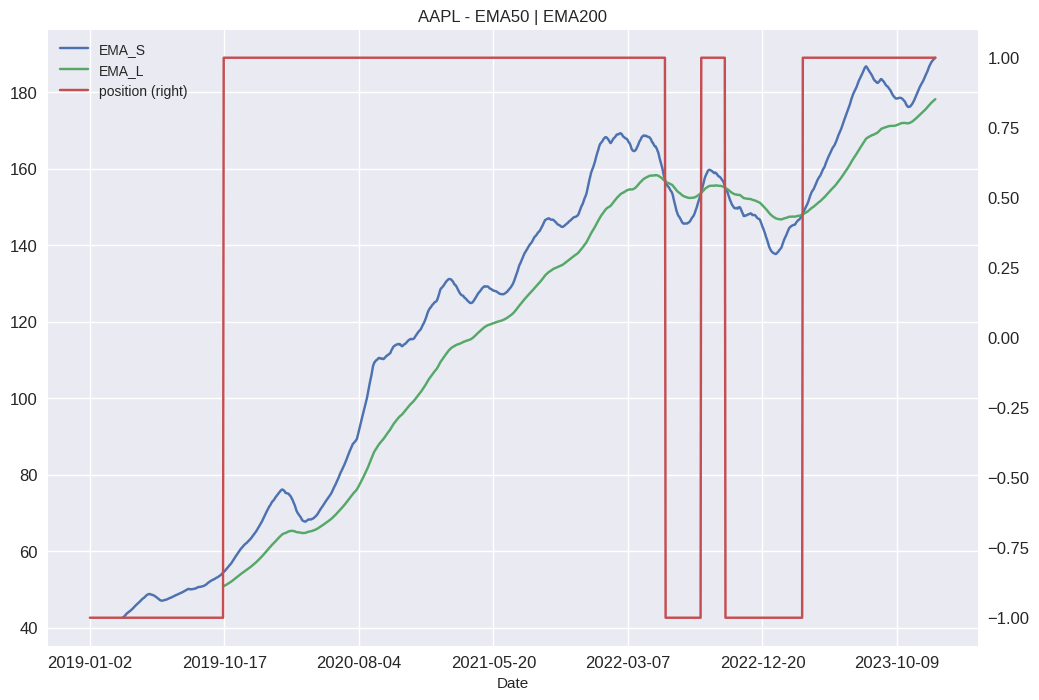

In [53]:
data.loc[:, ["EMA_S", "EMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                 title = "AAPL - EMA{} | EMA{}".format(ema_s, ema_l))
plt.show()

In [54]:
data["returns"] = np.log(data.Price.div(data.Price.shift(1)))

In [55]:
data.dropna(inplace = True)

In [56]:
data

,Price,EMA_S,EMA_L,position,returns
Date,,,,,
2019-10-16,58.59,54.609079,50.891710,1,-0.004088
2019-10-17,58.82,54.774267,50.982804,1,0.003918
2019-10-18,59.10,54.943956,51.075925,1,0.004749
2019-10-21,60.13,55.147390,51.179636,1,0.017278
2019-10-22,59.99,55.337351,51.280403,1,-0.002331
...,...,...,...,...,...
2023-12-22,193.60,188.226228,177.501485,1,-0.005563
2023-12-26,193.05,188.415396,177.656197,1,-0.002845
2023-12-27,193.15,188.601066,177.810365,1,0.000518


In [57]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [58]:
data

,Price,EMA_S,EMA_L,position,returns,strategy
Date,,,,,,
2019-10-16,58.59,54.609079,50.891710,1,-0.004088,NaN
2019-10-17,58.82,54.774267,50.982804,1,0.003918,0.003918
2019-10-18,59.10,54.943956,51.075925,1,0.004749,0.004749
2019-10-21,60.13,55.147390,51.179636,1,0.017278,0.017278
2019-10-22,59.99,55.337351,51.280403,1,-0.002331,-0.002331
...,...,...,...,...,...,...
2023-12-22,193.60,188.226228,177.501485,1,-0.005563,-0.005563
2023-12-26,193.05,188.415396,177.656197,1,-0.002845,-0.002845
2023-12-27,193.15,188.601066,177.810365,1,0.000518,0.000518


In [59]:
data.dropna(inplace = True)

In [60]:
data["trades"] = data.position.diff().fillna(0).abs()

In [61]:
ptc = 0.00007

In [62]:
data

,Price,EMA_S,EMA_L,position,returns,strategy,trades
Date,,,,,,,
2019-10-17,58.82,54.774267,50.982804,1,0.003918,0.003918,0.0
2019-10-18,59.10,54.943956,51.075925,1,0.004749,0.004749,0.0
2019-10-21,60.13,55.147390,51.179636,1,0.017278,0.017278,0.0
2019-10-22,59.99,55.337351,51.280403,1,-0.002331,-0.002331,0.0
2019-10-23,60.80,55.551631,51.389121,1,0.013412,0.013412,0.0
...,...,...,...,...,...,...,...
2023-12-22,193.60,188.226228,177.501485,1,-0.005563,-0.005563,0.0
2023-12-26,193.05,188.415396,177.656197,1,-0.002845,-0.002845,0.0
2023-12-27,193.15,188.601066,177.810365,1,0.000518,0.000518,0.0


In [63]:
data.position.value_counts()

,count
position,
1,890
-1,168


In [64]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [65]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
data["cstrategy_net"] = data["strategy_net"].cumsum().apply(np.exp)

In [66]:
data

,Price,EMA_S,EMA_L,position,returns,strategy,trades,strategy_net,creturns,cstrategy,cstrategy_net
Date,,,,,,,,,,,
2019-10-17,58.82,54.774267,50.982804,1,0.003918,0.003918,0.0,0.003918,1.003926,1.003926,1.003926
2019-10-18,59.10,54.943956,51.075925,1,0.004749,0.004749,0.0,0.004749,1.008705,1.008705,1.008705
2019-10-21,60.13,55.147390,51.179636,1,0.017278,0.017278,0.0,0.017278,1.026284,1.026284,1.026284
2019-10-22,59.99,55.337351,51.280403,1,-0.002331,-0.002331,0.0,-0.002331,1.023895,1.023895,1.023895
2019-10-23,60.80,55.551631,51.389121,1,0.013412,0.013412,0.0,0.013412,1.037720,1.037720,1.037720
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,193.60,188.226228,177.501485,1,-0.005563,-0.005563,0.0,-0.005563,3.304318,1.882458,1.881404
2023-12-26,193.05,188.415396,177.656197,1,-0.002845,-0.002845,0.0,-0.002845,3.294931,1.877110,1.876059
2023-12-27,193.15,188.601066,177.810365,1,0.000518,0.000518,0.0,0.000518,3.296638,1.878083,1.877031


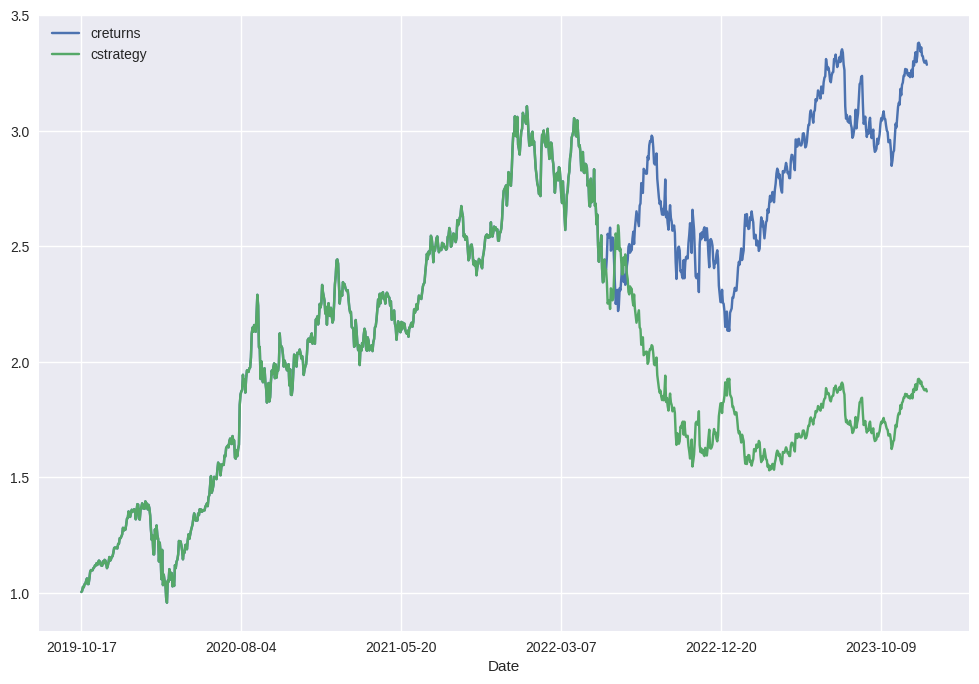

In [67]:
data[["creturns", "cstrategy" ]].plot(figsize = (12 , 8))
plt.show()

In [68]:
def run_strategy(EMA):
    data = df.copy()
    data["returns"] = np.log(data.Price.div(data.Price.shift(1)))
    data["EMA_S"] = data.Price.ewm(span = int(EMA[0]), min_periods = int(EMA[0])).mean()
    data["EMA_L"] = data.Price.ewm(span = int(EMA[1]), min_periods = int(EMA[1])).mean()
    data.dropna(inplace = True)

    data["position"] = np.where(data["EMA_S"] > data["EMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)


    return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]

In [69]:
-run_strategy((50, 200))

<ipython-input-68-ce383f8c9ad9>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]


1.8720540587960384

## Optimize the parameters

In [70]:
from scipy.optimize import brute

In [71]:
brute(run_strategy, ((10, 50, 1), (100, 250, 1)))

Streaming output truncated to the last 5000 lines.
<ipython-input-68-ce383f8c9ad9>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]
<ipython-input-68-ce383f8c9ad9>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]
<ipython-input-68-ce383f8c9ad9>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return -data[["

array([ 34., 154.])

In [72]:
-run_strategy((34, 154))

<ipython-input-68-ce383f8c9ad9>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]


2.72023519512739

## Return (01/01/2024 - 30/09/2024)

In [73]:
df = pd.read_csv("2024 AAPL.csv")
df2 = df.drop(["Open",'High', 'Low','Volume'], axis=1)
df2 = df2.rename(columns={'Close': 'Price'})
data1 = df2.set_index('Date')
data1

,Price
Date,
2024-01-02,185.64
2024-01-03,184.25
2024-01-04,181.91
2024-01-05,181.18
2024-01-08,185.56
...,...
2024-09-24,227.37
2024-09-25,226.37
2024-09-26,227.52


In [74]:
ema_s_o = 34
ema_l_o = 154

In [75]:
data1["EMA_S_o"] = data1.Price.ewm(span = ema_s_o, min_periods = ema_s_o).mean()
data1["EMA_L_o"] = data1.Price.ewm(span = ema_l_o, min_periods = ema_l_o).mean()

In [76]:
data1["position_o"] = np.where(data1["EMA_S_o"] > data1["EMA_L_o"], 1, -1 )

In [77]:
data1["returns_o"] = np.log(data1.Price.div(data1.Price.shift(1)))

In [78]:
data1.dropna(inplace = True)

In [79]:
data1["strategy_o"] = data1.position_o.shift(1) * data1["returns_o"]

In [80]:
data1.dropna(inplace = True)

In [81]:
data1["creturns_o"] = data1["returns_o"].cumsum().apply(np.exp)
data1["cstrategy_o"] = data1["strategy_o"].cumsum().apply(np.exp)

In [83]:
data1

,Price,EMA_S_o,EMA_L_o,position_o,returns_o,strategy_o,creturns_o,cstrategy_o
Date,,,,,,,,
2024-08-13,221.27,216.301928,200.194665,1,0.017047,0.017047,1.017193,1.017193
2024-08-14,221.72,216.611564,200.514598,1,0.002032,0.002032,1.019262,1.019262
2024-08-15,224.72,217.074948,200.873662,1,0.013440,0.013440,1.033053,1.033053
2024-08-16,226.05,217.587855,201.246408,1,0.005901,0.005901,1.039167,1.039167
2024-08-19,225.89,218.062305,201.610575,1,-0.000708,-0.000708,1.038431,1.038431
2024-08-20,226.51,218.545069,201.977833,1,0.002741,0.002741,1.041282,1.041282
2024-08-21,226.40,218.993957,202.337389,1,-0.000486,-0.000486,1.040776,1.040776
2024-08-22,224.53,219.310325,202.663526,1,-0.008294,-0.008294,1.032179,1.032179
2024-08-23,226.84,219.740622,203.018182,1,0.010236,0.010236,1.042799,1.042799


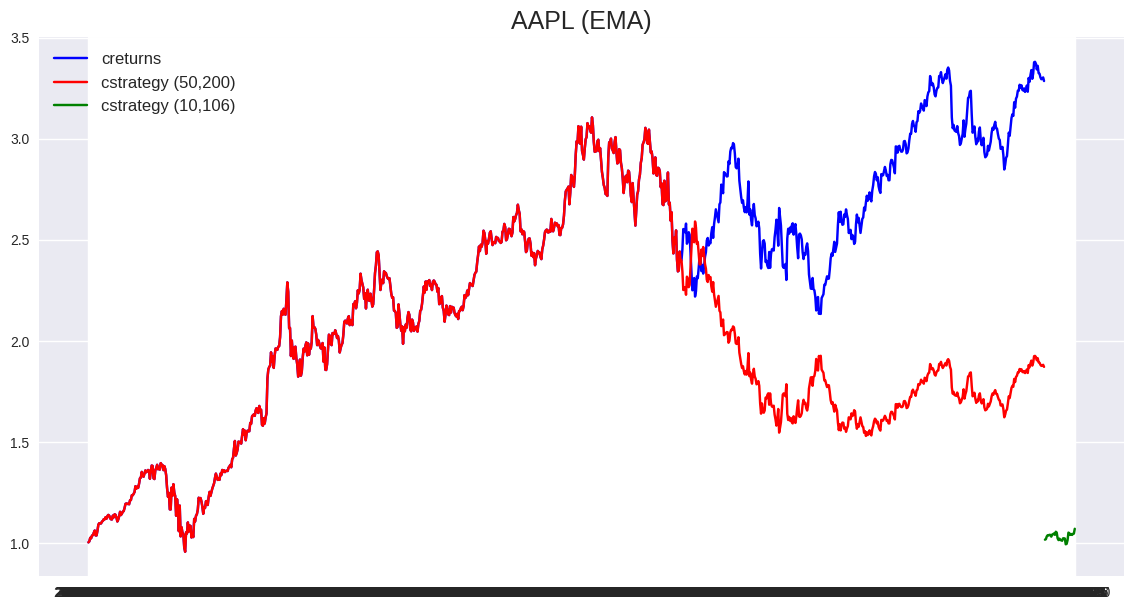

In [82]:
plt.figure(figsize=(14, 7))
plt.plot(data["creturns"], label="creturns", linestyle='-', color='b')
plt.plot(data["cstrategy"], label="cstrategy (50,200)", linestyle='-', color='r')

plt.plot(data1["cstrategy_o"], label="cstrategy (10,106)", linestyle='-', color='g')
plt.title("AAPL (EMA)", fontsize=18)
plt.legend(loc="best", fontsize=12)

plt.show()